## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np

/var/folders/ql/gqhky6457n35hwxmcls8sjc00000gn/T/ipykernel_27286/1663115498.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# DF's

In [2]:
disney = pd.read_csv("data/Disney_Stocks_NASDAQ.csv",delimiter=',')
disney[disney.columns[1:]] = disney[disney.columns[1:]].replace(r'[\$,]', '', regex=True).astype(float)
disney

,Date,Close/Last,Volume,Open,High,Low
0,04/10/2024,117.19,6746282.0,116.60,117.560,116.3700
1,04/09/2024,117.97,7455367.0,117.38,118.510,116.8900
2,04/08/2024,117.35,6266011.0,118.02,118.520,116.8200
3,04/05/2024,118.38,9653915.0,116.60,118.860,116.3000
4,04/04/2024,117.09,13815400.0,119.22,120.190,116.9600
...,...,...,...,...,...,...
2511,04/17/2014,79.99,7627723.0,78.70,80.220,78.6000
2512,04/16/2014,78.95,5954797.0,78.38,78.980,78.1901
2513,04/15/2014,77.66,6398091.0,77.89,78.209,76.3100
2514,04/14/2014,77.62,5964608.0,77.70,77.830,76.8500


In [3]:
disney['date'] = pd.to_datetime(disney['Date']).dt.date
disney = disney.drop("Date", axis = 1)
disney

,Close/Last,Volume,Open,High,Low,date
0,117.19,6746282.0,116.60,117.560,116.3700,2024-04-10
1,117.97,7455367.0,117.38,118.510,116.8900,2024-04-09
2,117.35,6266011.0,118.02,118.520,116.8200,2024-04-08
3,118.38,9653915.0,116.60,118.860,116.3000,2024-04-05
4,117.09,13815400.0,119.22,120.190,116.9600,2024-04-04
...,...,...,...,...,...,...
2511,79.99,7627723.0,78.70,80.220,78.6000,2014-04-17
2512,78.95,5954797.0,78.38,78.980,78.1901,2014-04-16
2513,77.66,6398091.0,77.89,78.209,76.3100,2014-04-15
2514,77.62,5964608.0,77.70,77.830,76.8500,2014-04-14


In [4]:
rc = pd.read_csv("data/comments.csv")
rc['Date'] = pd.to_datetime(rc['date']).dt.date
rc['Time'] = pd.to_datetime(rc['date']).dt.time
rc = rc.drop(["date","Time"], axis='columns')
rc

,comment_id,post_id,body,Date
0,kyvb3x0,1c08w09,Don't forget that Disney owns Hulu so boycott ...,2024-04-10
1,kv5x740,1bg9err,Given how the counter-productive actions of fa...,2024-03-16
2,kv6e8vl,1bg9err,Just like Sesame Street needed a cofunding dea...,2024-03-16
3,kv5uvdu,1bg9err,"Frankly, I have no interest in this. I'll watc...",2024-03-16
4,kv6pibp,1bg9err,Russell T Davies gave a talk somewhere a few y...,2024-03-16
...,...,...,...,...
196,khu598n,195dvjg,I remain confused about why it is so hard to i...,2024-01-14
197,khw8wqg,195dvjg,This post is from 6 years ago. A lot can chang...,2024-01-15
198,khynuoc,195dvjg,I remain confused as to how it’s hard to under...,2024-01-15
199,khwaplv,195dvjg,https://www.tehrantimes.com/news/490473/Disney...,2024-01-15


In [5]:
rp = pd.read_csv("data/posts.csv")
rp['Date'] = pd.to_datetime(rp['date']).dt.date
rp['Time'] = pd.to_datetime(rp['date']).dt.time
rp = rp.drop(["date","Time"], axis='columns')
rp

,post_id,title,url,selftext,Date
0,1c08w09,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-10
1,1c05vei,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-09
2,1c04h9l,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-09
3,1c00am9,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-09
4,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16
5,1b9cpvd,BOYCOTT DISNEY AND PIXAR!!!! #FuckDisney #Fuck...,https://i.redd.it/wlalipq0v0nc1.png,NaN,2024-03-08
6,1amt3o4,The Disney boycott is having an effect. Keep i...,https://i.redd.it/qbaie4yvdlhc1.jpeg,NaN,2024-02-09
7,1agbn9h,Target Liquidates Disney Products as Boycott C...,https://insidethemagic.net/2024/02/target-disn...,NaN,2024-02-01
8,1aga4io,Target Liquidates Disney Products as Boycott C...,https://insidethemagic.net/2024/02/target-disn...,NaN,2024-02-01
9,1aga45u,Target Liquidates Disney Products as Boycott C...,https://insidethemagic.net/2024/02/target-disn...,NaN,2024-02-01


In [6]:
reddit = rp.merge(rc,on = "post_id")
reddit = reddit.drop("Date_y", axis = 1)
reddit

,post_id,title,url,selftext,Date_x,comment_id,body
0,1c08w09,Boycott Disney,https://i.redd.it/gjut5irb5itc1.jpeg,NaN,2024-04-10,kyvb3x0,Don't forget that Disney owns Hulu so boycott ...
1,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv5x740,Given how the counter-productive actions of fa...
2,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv6e8vl,Just like Sesame Street needed a cofunding dea...
3,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv5uvdu,"Frankly, I have no interest in this. I'll watc..."
4,1bg9err,We can boycott Disney for the decision of UK m...,https://www.reddit.com/r/gallifrey/comments/1b...,Basically don't use Disney to watch Doctor Who...,2024-03-16,kv6pibp,Russell T Davies gave a talk somewhere a few y...
...,...,...,...,...,...,...,...
196,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khu598n,I remain confused about why it is so hard to i...
197,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khw8wqg,This post is from 6 years ago. A lot can chang...
198,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khynuoc,I remain confused as to how it’s hard to under...
199,195dvjg,Do you boycott Disney even if it’s not what yo...,https://www.reddit.com/r/AskParents/comments/1...,I’m asking mostly because I’ve read things fro...,2024-01-13,khwaplv,https://www.tehrantimes.com/news/490473/Disney...


## EDA 

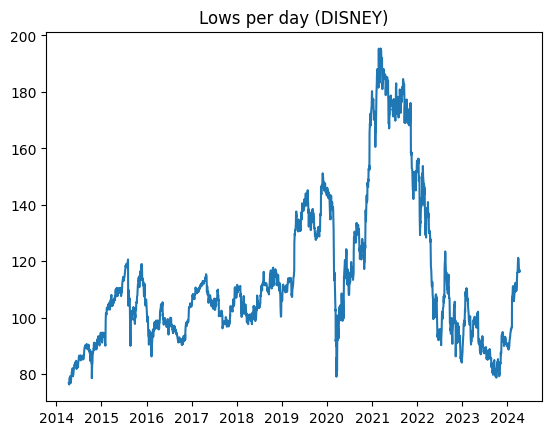

In [7]:
plt.plot("date", "Low", data = disney)
plt.title("Lows per day (DISNEY)")

plt.savefig('data/Lows per day (DISNEY)')

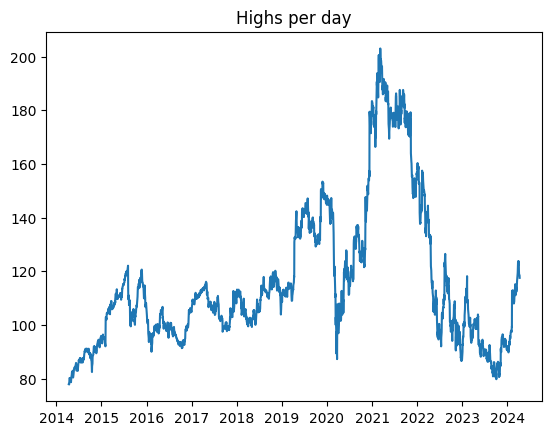

In [8]:
plt.plot("date", "High", data = disney)
plt.title("Highs per day")

plt.savefig('data/Highs per day (DISNEY)')

In [9]:
reddit.groupby("post_id").agg("count").reset_index()
reddit.to_csv('data/reddit.csv')

## Sentiment Analysis

In [10]:
rc_list = []
for i in range(len(rc)):
    p_1 = TextBlob(rc["body"][i]).sentiment.polarity
    rc_list.append(p_1)

In [11]:
rc_list

[0.0,
 0.1786096256684492,
 0.2357142857142857,
 0.13636363636363635,
 -0.25833333333333336,
 -0.25,
 -0.33142857142857146,
 -0.1,
 0.16095238095238093,
 0.0,
 0.18333333333333335,
 0.0,
 0.20999999999999996,
 -0.5,
 0.12666666666666665,
 0.19374999999999998,
 0.10909090909090909,
 0.07333333333333335,
 0.0,
 -0.024999999999999994,
 0.0,
 -0.5,
 0.0,
 0.040624999999999994,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03585858585858587,
 -0.007482993197278911,
 -0.0035714285714285587,
 0.0,
 0.04554924242424242,
 -0.13,
 0.02083333333333333,
 0.0,
 0.0,
 0.0,
 0.4,
 -0.6666666666666666,
 0.13636363636363635,
 0.19152462121212124,
 0.125,
 0.39375,
 0.225,
 0.016666666666666666,
 0.0,
 0.05,
 0.062121212121212126,
 0.0625,
 0.0,
 0.0,
 0.042857142857142864,
 0.0909090909090909,
 -0.13333333333333333,
 -0.41666666666666663,
 -0.25,
 0.6,
 0.0,
 0.0,
 -0.10982954545454546,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4616666666666666,
 -0.15357142857142855,
 0.28571428571428

In [12]:
rp_list = []
for i in range(12):
    p_1 = TextBlob(rp["title"][i]).sentiment.polarity
    rp_list.append(p_1)

In [13]:
rp_list

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.39999999999999997, 0.0]

In [14]:
rc_dict = {"comments":rc["comment_id"], "sentiment": rc_list, "date":rc['Date']}
df = pd.DataFrame.from_dict(rc_dict)
df['sentiment'].mean()

0.055463481402846

In [15]:
ndf = df.merge(disney, on = "date")
ndf

,comments,sentiment,date,Close/Last,Volume,Open,High,Low
0,kyvb3x0,0.000000,2024-04-10,117.19,6746282.0,116.600,117.56,116.3700
1,kvd4m1k,-0.007483,2024-03-18,113.85,11820760.0,112.290,114.43,112.2900
2,kvk3xmk,-0.003571,2024-03-19,114.51,10999740.0,113.410,115.17,113.2431
3,kvgyszq,-0.133333,2024-03-18,113.85,11820760.0,112.290,114.43,112.2900
4,ktvd39a,0.400000,2024-03-08,110.32,10009190.0,110.180,111.31,109.3400
5,ktv7bdc,-0.200000,2024-03-08,110.32,10009190.0,110.180,111.31,109.3400
6,ktwfez6,0.000000,2024-03-08,110.32,10009190.0,110.180,111.31,109.3400
7,kpo3phi,0.000000,2024-02-09,108.39,21509090.0,109.600,110.15,107.6900
8,kiz9ka7,0.057738,2024-01-22,95.08,15119380.0,92.870,95.23,92.8700
9,kiz79e4,0.000000,2024-01-22,95.08,15119380.0,92.870,95.23,92.8700


In [16]:
np.corrcoef(ndf["sentiment"], ndf["Close/Last"])

array([[ 1.        , -0.39410072],
       [-0.39410072,  1.        ]])

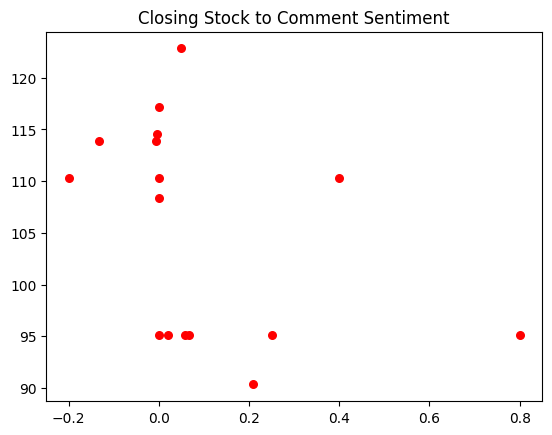

In [17]:
plt.scatter(ndf["sentiment"],ndf["Close/Last"], color = "r", marker = "o", s = 30)
plt.title("Closing Stock to Comment Sentiment")

plt.savefig('data/Closing Stock to Comment Sentiment')

In [18]:
rp_dict = {"comments":rp["post_id"], "sentiment": rp_list,"date":rp['Date']}
df1 = pd.DataFrame.from_dict(rp_dict)
df1['sentiment'].mean()

0.15833333333333333

In [19]:
ndf1 = df1.merge(disney, on = "date")
ndf

,comments,sentiment,date,Close/Last,Volume,Open,High,Low
0,kyvb3x0,0.000000,2024-04-10,117.19,6746282.0,116.600,117.56,116.3700
1,kvd4m1k,-0.007483,2024-03-18,113.85,11820760.0,112.290,114.43,112.2900
2,kvk3xmk,-0.003571,2024-03-19,114.51,10999740.0,113.410,115.17,113.2431
3,kvgyszq,-0.133333,2024-03-18,113.85,11820760.0,112.290,114.43,112.2900
4,ktvd39a,0.400000,2024-03-08,110.32,10009190.0,110.180,111.31,109.3400
5,ktv7bdc,-0.200000,2024-03-08,110.32,10009190.0,110.180,111.31,109.3400
6,ktwfez6,0.000000,2024-03-08,110.32,10009190.0,110.180,111.31,109.3400
7,kpo3phi,0.000000,2024-02-09,108.39,21509090.0,109.600,110.15,107.6900
8,kiz9ka7,0.057738,2024-01-22,95.08,15119380.0,92.870,95.23,92.8700
9,kiz79e4,0.000000,2024-01-22,95.08,15119380.0,92.870,95.23,92.8700


In [20]:
np.corrcoef(ndf1["sentiment"], ndf1["Close/Last"])

array([[ 1.        , -0.93064443],
       [-0.93064443,  1.        ]])

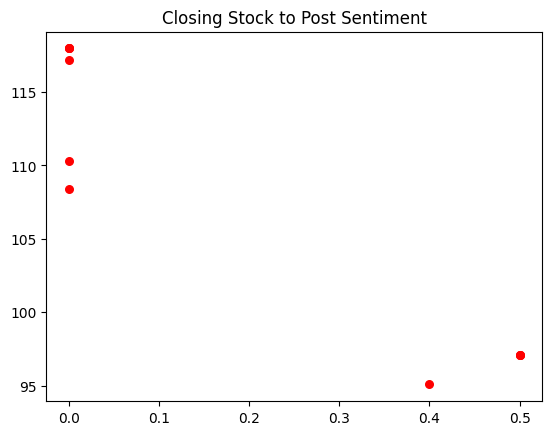

In [21]:
plt.scatter(ndf1["sentiment"],ndf1["Close/Last"], color = "r", marker = "o", s = 30)
plt.title("Closing Stock to Post Sentiment")

plt.savefig('data/Closing Stock to Post Sentiment')